# <center> CHOOSING PRIOR 2 </center>

---
# GAMMA $\propto$ EXP $\times$ GAMMA

Nhắc lại:
- Exponential distribution để mô phỏng thời gian chờ $\lambda$, mean = $^1/_\lambda$
- Gamma distribution để mô phỏng n lần Exp($\lambda$), a=n, b=$\lambda$, mean = a/b, var = a/b$^2$

Như vậy:
- Gamma là conjugate prior cho Exp


### Chọn params cho gamma prior
Giả sử thời gian chờ khám trung bình mà mình biết là 10 phút. $\lambda$ = Rate = $^1/_{10}$   
- Vậy Gamma prior f($\lambda$) có mean = $^1/_{10}$ = 0.1
- và nếu mình sure nhiều thì std thấp (a,b lớn)  
    - prior $\sim \Gamma (\alpha = 100, \beta = 1000)$
    - mean = $^{100}/_{1000}$ = 0.1
    - var = $^{100}/_{1000^2}$ = $10^{-4}$
    - std = $\sqrt{\text{var}}$ = $10^{-2}$ = 0.01
- Theo frequentist thì mean của gamma prior có CI 95% = $0.1 \pm 1.96 \times 0.01$  

### Thu thập data:  
Thời gian chờ khám của một bệnh nhân mới là 12 phút. Y=12  

### Gamma posterior
f($\lambda$/y) $\propto$ f(y/$\lambda$) $\times$ f($\lambda$)  
=> f($\lambda$/y) $\propto$ $\lambda$e$^{-\lambda y}$  $\lambda^{\alpha-1}$e$^{-\beta\lambda}$  
=> f($\lambda$/y) $\propto$ $\lambda^{(\alpha+1)-1}$e$^{-(\beta+y)\lambda}$  
=> f($\lambda$/y) $\propto$ $\Gamma$ ($\alpha+1$, $\beta+y$)

Với Y=12 thì posterior $\propto$ $\Gamma$ (100+1, 1000+12), mean = 101/1012 = 0.0998 = 1/10.02  
Vì trong prior của mình có a,b lớn, mức độ sure cao, nên 1 data mới không làm thay đổi mean nhiều.  
Có thể diễn giải posterior như sau:  
Nếu tốc độ khám $\lambda$ = 0.0998/phút thì sau 10.02 phút thì có một lượt khám mới. 

In [39]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

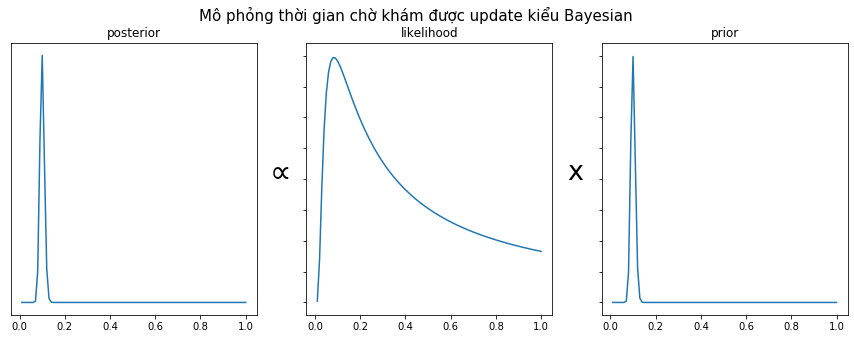

In [68]:
prior = st.gamma(a=100, scale=1/1000)
poster = st.gamma(a=101, scale=1/1012)

arr = np.linspace(0.01,1,100)

fig, ax = plt.subplots(1,3, figsize=(15,5), sharex='all', sharey='all')

ax[0].plot(arr, poster.pdf(arr))
ax[0].set_title("posterior");

ax[1].plot(arr, st.expon.pdf(1/12, scale=arr)*9)
ax[1].set_title("likelihood")

ax[2].plot(arr, prior.pdf(arr))
ax[2].set_title("prior");

ax[0].get_yaxis().set_visible(False)
fig.text(0.36,0.5,"$\propto$", size=30)
fig.text(0.64,0.5,"x", size=27);
fig.suptitle("Mô phỏng thời gian chờ khám được update kiểu Bayesian", size=15);

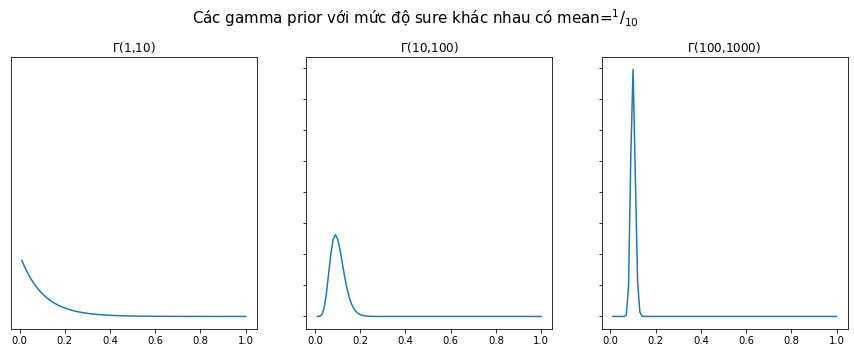

In [79]:
prior1 = st.gamma(a=1, scale=1/10)
prior2 = st.gamma(a=10, scale=1/100)
prior3 = st.gamma(a=100, scale=1/1000)

arr = np.linspace(0.01,1,100)

fig, ax = plt.subplots(1,3, figsize=(15,5), sharex='all', sharey='all')

ax[0].plot(arr, prior1.pdf(arr))
ax[0].set_title("$\Gamma$(1,10)");

ax[1].plot(arr, prior2.pdf(arr))
ax[1].set_title("$\Gamma$(10,100)");

ax[2].plot(arr, prior3.pdf(arr))
ax[2].set_title("$\Gamma$(100,1000)")

ax[0].get_yaxis().set_visible(False);
fig.suptitle("Các gamma prior với mức độ sure khác nhau có mean=$^1/_{10}$", size=15,y=1.02);

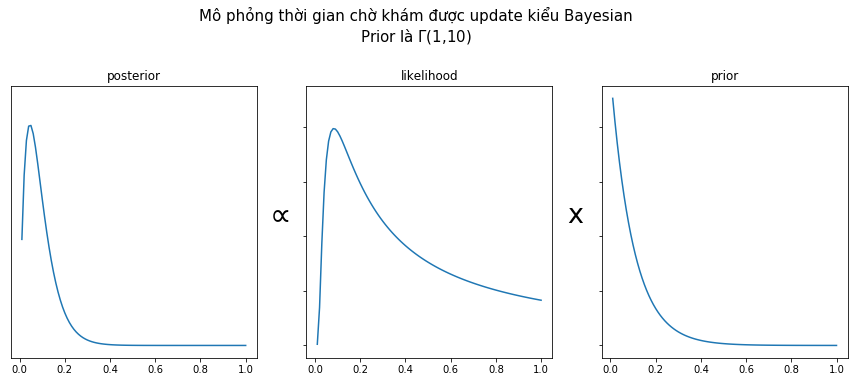

In [83]:
prior = st.gamma(a=1, scale=1/10)
poster = st.gamma(a=2, scale=1/22)

arr = np.linspace(0.01,1,100)

fig, ax = plt.subplots(1,3, figsize=(15,5), sharex='all', sharey='all')

ax[0].plot(arr, poster.pdf(arr))
ax[0].set_title("posterior");

ax[1].plot(arr, st.expon.pdf(1/12, scale=arr)*1.8)
ax[1].set_title("likelihood")

ax[2].plot(arr, prior.pdf(arr))
ax[2].set_title("prior");

ax[0].get_yaxis().set_visible(False)
fig.text(0.36,0.5,"$\propto$", size=30)
fig.text(0.64,0.5,"x", size=27);
fig.suptitle("Mô phỏng thời gian chờ khám được update kiểu Bayesian\nPrior là $\Gamma$(1,10)", size=15,y=1.1);